In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [2]:
df = pd.read_csv('/kaggle/input/unemployment-by-county-us/output.csv')
df.head()

,Year,Month,State,County,Rate
0,2015,February,Mississippi,Newton County,6.1
1,2015,February,Mississippi,Panola County,9.4
2,2015,February,Mississippi,Monroe County,7.9
3,2015,February,Mississippi,Hinds County,6.1
4,2015,February,Mississippi,Kemper County,10.6


****Year unique values****

In [3]:
df.Year.unique()

array([2015, 2014, 2016, 2011, 2010, 2013, 2012, 1991, 1990, 1993, 1992,
       1995, 1994, 1997, 1996, 1999, 1998, 2002, 2003, 2000, 2001, 2006,
       2007, 2004, 2005, 2008, 2009])

****Count of unique counties****

In [4]:
len(df.County.unique())

1752

****Count of unique states****

In [5]:
len(df.State.unique())

47

****Shape of Dataframe****

In [6]:
df.shape

(885548, 5)

****Column Names****

In [7]:
df.columns

Index(['Year', 'Month', 'State', 'County', 'Rate'], dtype='object')

****Info of Dataframe****

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885548 entries, 0 to 885547
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Year    885548 non-null  int64  
 1   Month   885548 non-null  object 
 2   State   885548 non-null  object 
 3   County  885548 non-null  object 
 4   Rate    885548 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 33.8+ MB


****Dropping Duplicates****

In [9]:
df.drop_duplicates()

,Year,Month,State,County,Rate
0,2015,February,Mississippi,Newton County,6.1
1,2015,February,Mississippi,Panola County,9.4
2,2015,February,Mississippi,Monroe County,7.9
3,2015,February,Mississippi,Hinds County,6.1
4,2015,February,Mississippi,Kemper County,10.6
...,...,...,...,...,...
885543,2009,November,Maine,Somerset County,10.5
885544,2009,November,Maine,Oxford County,10.5
885545,2009,November,Maine,Knox County,7.5
885546,2009,November,Maine,Piscataquis County,11.3


****Unique month values****

In [10]:
df.Month.unique()

array(['February', 'October', 'March', 'August', 'May', 'January', 'June',
       'September', 'April', 'December', 'July', 'November'], dtype=object)

****Creating Quarter Column****

In [11]:
def get_quarter(month):
    if month in ["January","February","March"]:
        return 1
    elif month in ["April","May","June"]:
        return 2
    elif month in ["July","August","September"]:
        return 3
    else:
        return 4

In [12]:
df['Quarter'] = df.Month.apply(lambda x: get_quarter(x))
df.head()

,Year,Month,State,County,Rate,Quarter
0,2015,February,Mississippi,Newton County,6.1,1
1,2015,February,Mississippi,Panola County,9.4,1
2,2015,February,Mississippi,Monroe County,7.9,1
3,2015,February,Mississippi,Hinds County,6.1,1
4,2015,February,Mississippi,Kemper County,10.6,1


****Correlation between Columns****

/tmp/ipykernel_32/832035378.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

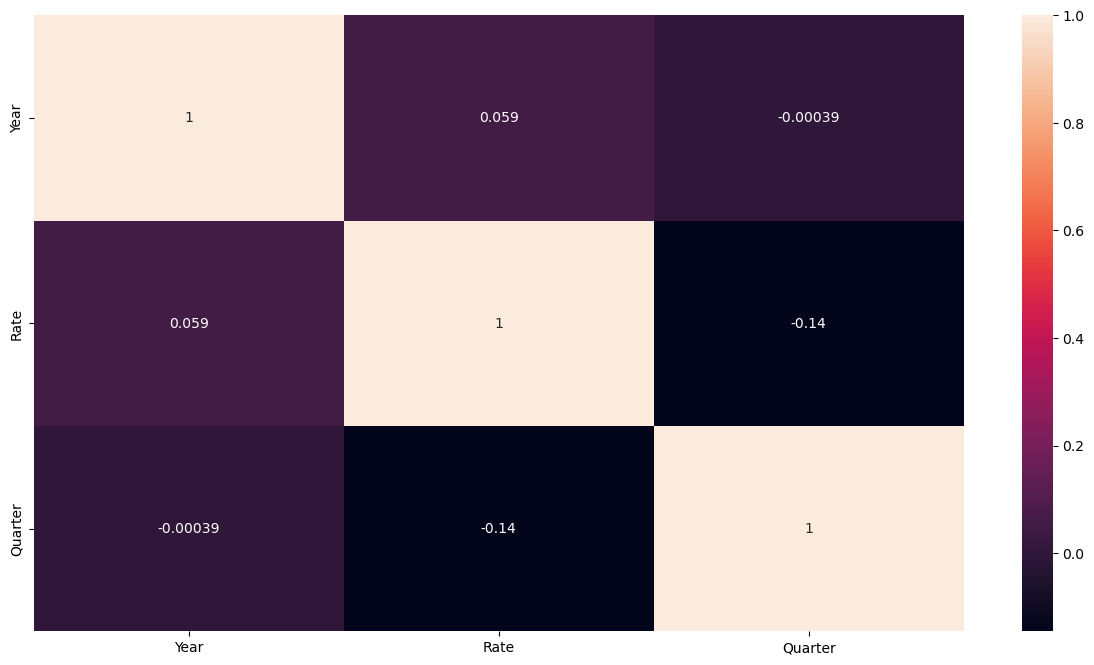

In [13]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

In [14]:
df.describe()

,Year,Rate,Quarter
count,885548.000000,885548.000000,885548.000000
mean,2003.000017,6.175010,2.498442
std,7.824893,3.112535,1.118418
min,1990.000000,0.000000,1.000000
25%,1996.000000,4.000000,1.000000
50%,2003.000000,5.500000,2.000000
75%,2010.000000,7.700000,3.000000
max,2016.000000,58.400000,4.000000


****Year by Rate Scatter****

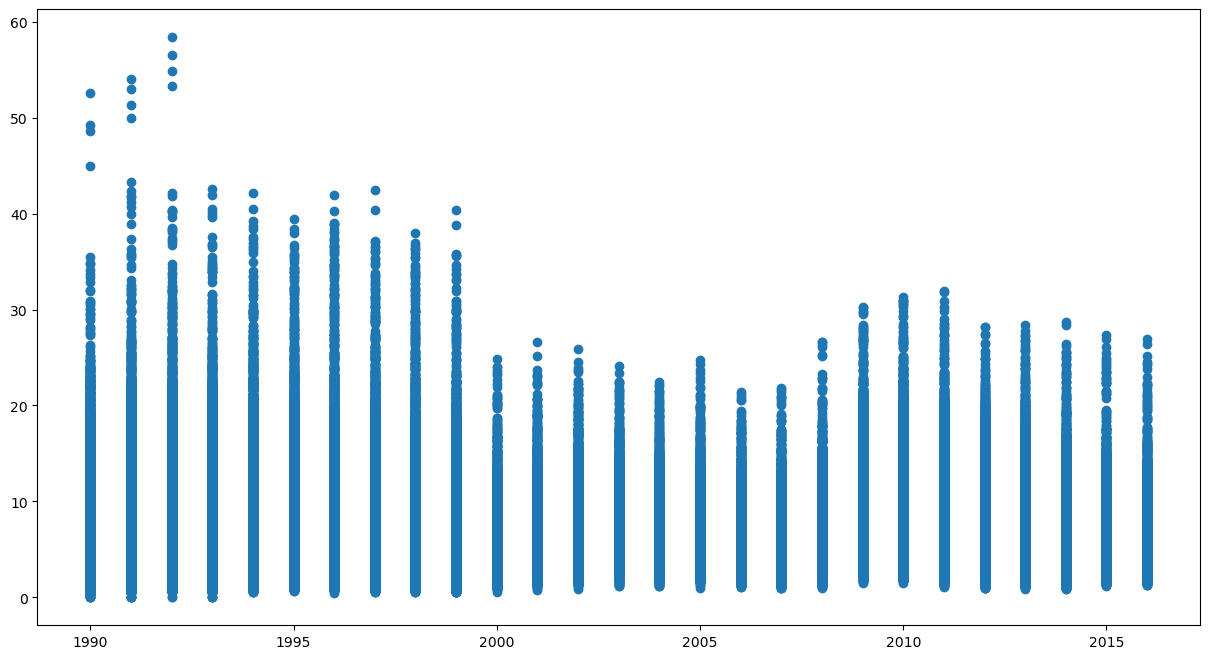

In [15]:
plt.figure(figsize=(15,8))
plt.scatter(df['Year'],df['Rate'])

****Check Outliers for year****

<Axes: >

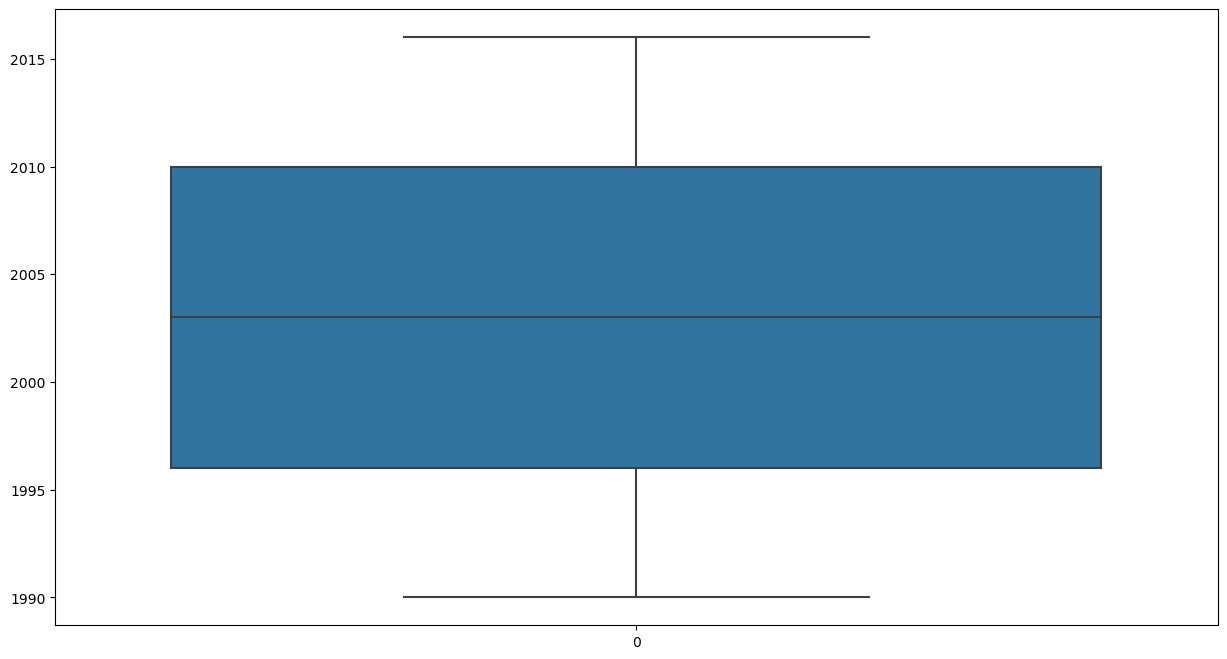

In [16]:
plt.figure(figsize=(15,8))
sns.boxplot(df['Year'])

/tmp/ipykernel_32/1202410964.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Year'])


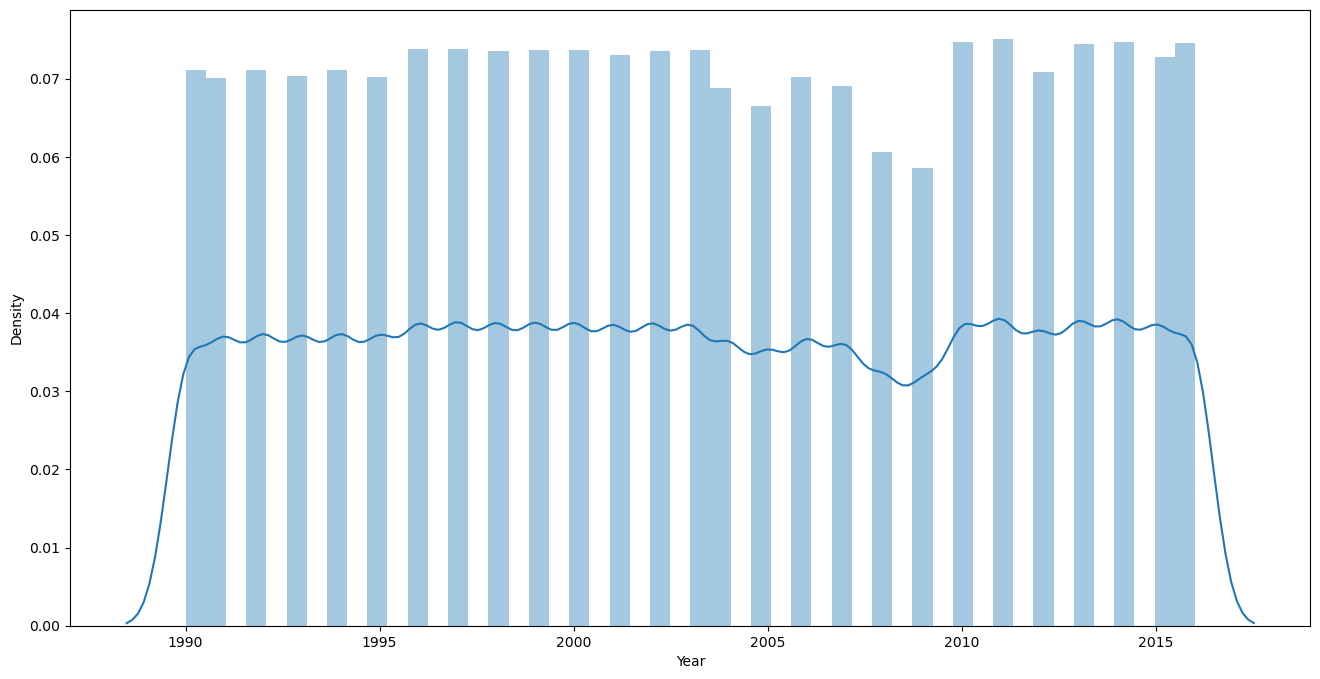

In [17]:
plt.figure(figsize=(16,8))
# plt.subplot(1,2,1)
sns.distplot(df['Year'])
plt.show()

In [18]:
df['year_z_score'] = zscore(df['Year'])
df.head()

,Year,Month,State,County,Rate,Quarter,year_z_score
0,2015,February,Mississippi,Newton County,6.1,1,1.533566
1,2015,February,Mississippi,Panola County,9.4,1,1.533566
2,2015,February,Mississippi,Monroe County,7.9,1,1.533566
3,2015,February,Mississippi,Hinds County,6.1,1,1.533566
4,2015,February,Mississippi,Kemper County,10.6,1,1.533566


In [19]:
outliers = df[(df['year_z_score']>3) | (df['year_z_score']<-3)]
outliers

,Year,Month,State,County,Rate,Quarter,year_z_score


****Check outliers for Rate****

<Axes: ylabel='count'>

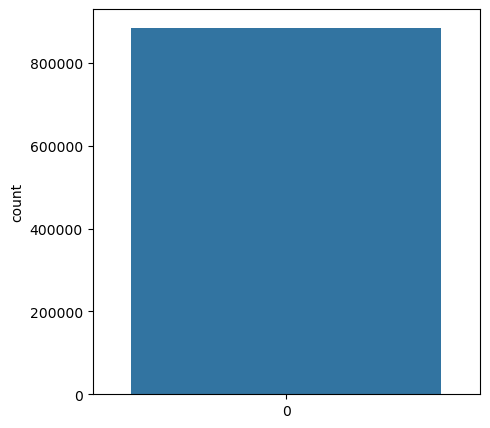

In [20]:
plt.figure(figsize=(5,5))
sns.countplot(df.Rate)

<Axes: >

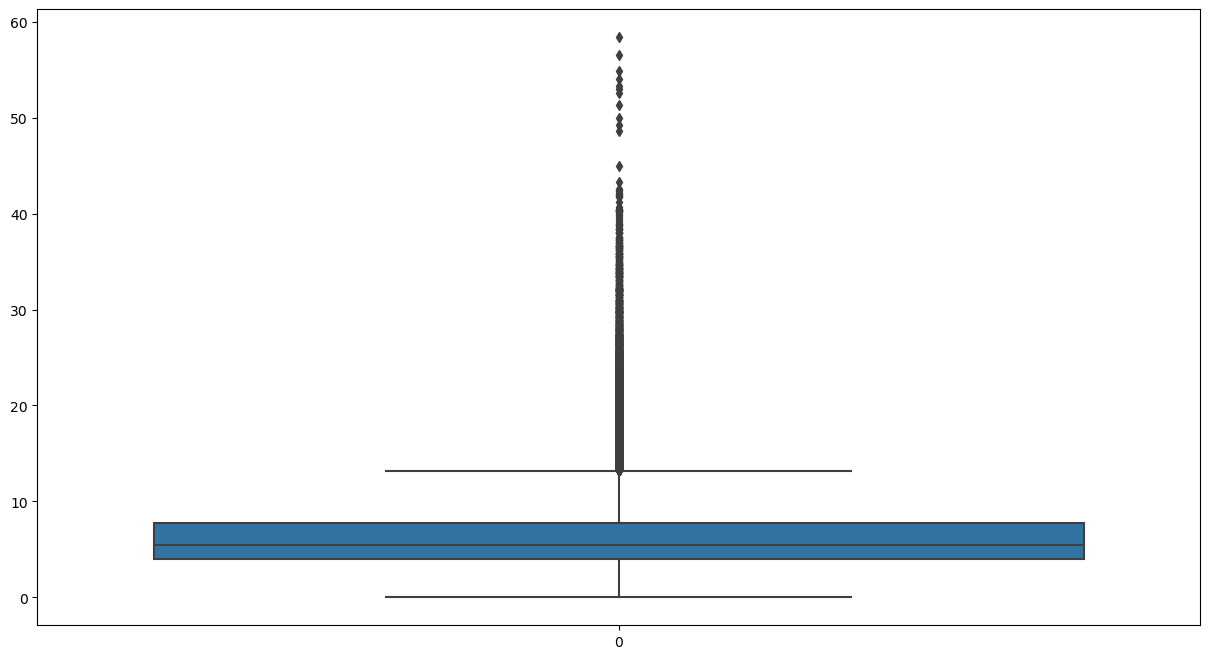

In [21]:
plt.figure(figsize=(15,8))
sns.boxplot(df['Rate'])

/tmp/ipykernel_32/2133488489.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Rate'])


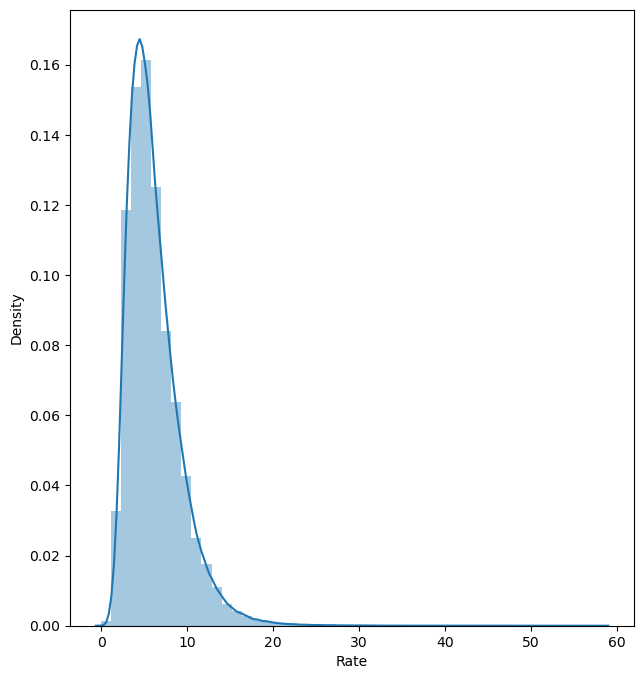

In [22]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.distplot(df['Rate'])
plt.show()

****The distribution is right-skewed because it’s longer on the right side of its peak****

In [23]:
df['Rate'].mean(),df['Rate'].median()

(6.175009711500675, 5.5)

****Here mean > median, so its right-skewed****

****Removing ouliers from Rate column****

In [24]:
df['rate_z_score'] = zscore(df['Rate'])
df.head()

,Year,Month,State,County,Rate,Quarter,year_z_score,rate_z_score
0,2015,February,Mississippi,Newton County,6.1,1,1.533566,-0.024099
1,2015,February,Mississippi,Panola County,9.4,1,1.533566,1.036130
2,2015,February,Mississippi,Monroe County,7.9,1,1.533566,0.554208
3,2015,February,Mississippi,Hinds County,6.1,1,1.533566,-0.024099
4,2015,February,Mississippi,Kemper County,10.6,1,1.533566,1.421669


In [25]:
outliers = df[(df['rate_z_score']>3) | (df['rate_z_score']<-3)]
outliers

,Year,Month,State,County,Rate,Quarter,year_z_score,rate_z_score
68,2015,February,Mississippi,Issaquena County,21.5,1,1.533566,4.923639
436,2015,February,New Mexico,Luna County,21.2,1,1.533566,4.827255
567,2015,February,Maryland,Worcester County,15.6,1,1.533566,3.028077
604,2015,February,Louisiana,East Carroll Parish,16.0,1,1.533566,3.156590
606,2015,February,Louisiana,West Carroll Parish,16.1,1,1.533566,3.188718
...,...,...,...,...,...,...,...,...
885384,2009,November,North Carolina,Edgecombe County,16.2,4,0.766782,3.220846
885394,2009,November,North Carolina,Scotland County,16.4,4,0.766782,3.285103
885411,2009,November,North Carolina,Rutherford County,16.2,4,0.766782,3.220846
885435,2009,November,North Carolina,Graham County,16.6,4,0.766782,3.349359


****Highest Rate Year wise****

In [26]:
df_years = df.groupby('Year')
df_years['Rate'].mean().sort_values(ascending=False)

Year
2010    9.189580
2009    8.883838
2011    8.523477
2012    7.657544
1992    7.464904
2013    7.211610
1991    7.142391
1993    6.924037
1994    6.186649
2014    6.096365
1990    6.093021
2003    6.027990
1996    5.912081
1995    5.893411
2008    5.759990
2002    5.720915
2004    5.695817
1997    5.474520
2005    5.438981
2015    5.401873
2016    5.160680
1998    5.114221
2001    4.985591
2006    4.979263
2007    4.896069
1999    4.873476
2000    4.321123
Name: Rate, dtype: float64

In [27]:
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [28]:
# # df.groupby(['Year', 'Month'])['Rate'].max()
highest_values = df.groupby(['Year', 'Month'])['Rate'].mean()

# # Reset the index to convert the result into a DataFrame
highest_values = highest_values.reset_index()

highest_rows = highest_values.loc[highest_values.groupby('Year')['Rate'].idxmax()]
highest_rows

,Year,Month,Rate
3,1990,February,7.123685
15,1991,February,8.315527
27,1992,February,8.954110
40,1993,January,8.453421
52,1994,January,7.842644
64,1995,January,7.007012
76,1996,January,7.325594
88,1997,January,7.011060
100,1998,January,6.226196
112,1999,January,5.996668


****Monthwise Average Unemployment Rate****

In [29]:
highest_values = df.groupby(['Month'])['Rate'].mean()
highest_values

Month
April        6.011266
August       5.853476
December     6.037602
February     7.108245
January      7.215534
July         6.160219
June         6.262862
March        6.787332
May          5.868393
November     5.762969
October      5.465816
September    5.558903
Name: Rate, dtype: float64

In [30]:
highest_values = highest_values.reset_index()
highest_values.index=pd.CategoricalIndex(highest_values['Month'],categories=new_order,ordered=True)
highest_values=highest_values.sort_index().reset_index(drop=True)
highest_values

,Month,Rate
0,January,7.215534
1,February,7.108245
2,March,6.787332
3,April,6.011266
4,May,5.868393
5,June,6.262862
6,July,6.160219
7,August,5.853476
8,September,5.558903
9,October,5.465816


In [31]:
highest_values.set_index('Month',inplace=True)
highest_values

,Rate
Month,
January,7.215534
February,7.108245
March,6.787332
April,6.011266
May,5.868393
June,6.262862
July,6.160219
August,5.853476
September,5.558903


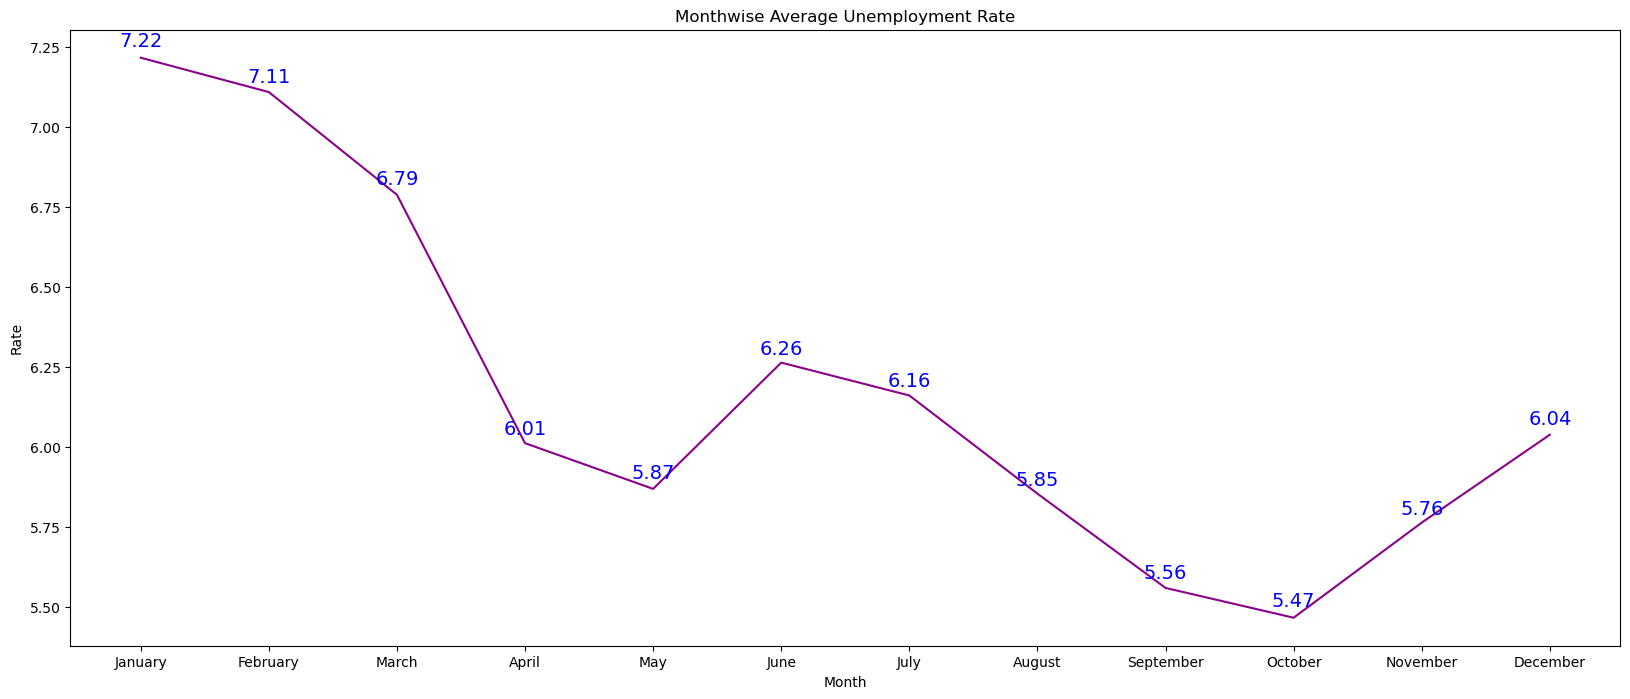

In [32]:
plt.figure(figsize=(20,8))
plt.plot(highest_values.index, highest_values['Rate'],color="darkmagenta")

plt.xlabel('Month')
plt.ylabel('Rate')
plt.title('Monthwise Average Unemployment Rate')

for x, y in zip(highest_values.index, highest_values.values):
    y= round(float(y),2)
    plt.text(x, y+0.03, str(y), ha='center',color='blue',fontsize=14)

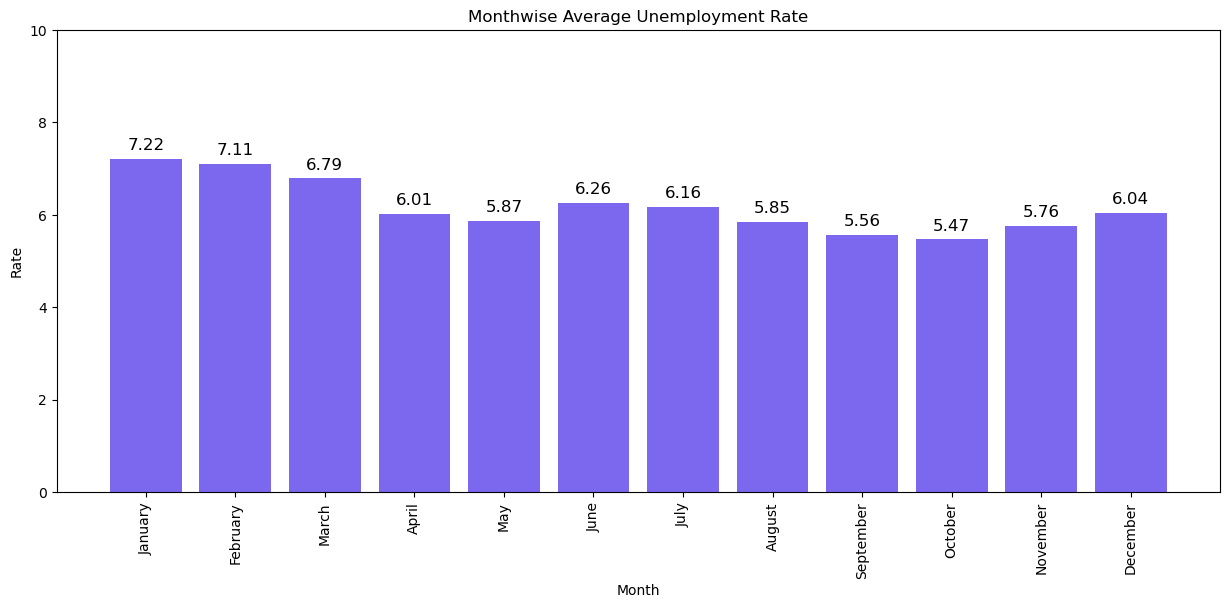

In [33]:
plt.figure(figsize=(15,6))
plt.bar(highest_values.index, highest_values['Rate'],color='mediumslateblue')

# set the axis labels and title
plt.xlabel('Month')
plt.ylabel('Rate')
plt.title('Monthwise Average Unemployment Rate')

# rotate the x-axis labels for better visibility
plt.xticks(rotation=90)
plt.ylim((0,10))
for i, v in enumerate(highest_values['Rate']):
    plt.text(highest_values.index[i], v+0.2, str(round(v,2)), fontsize=12, color='black', ha='center')
# show the plot
plt.show()

****Quarterwise Average Unemployment Rate****

In [34]:
highest_values = df.groupby(['Quarter'])['Rate'].mean()
highest_values

Quarter
1    7.036077
2    6.047512
3    5.858108
4    5.755461
Name: Rate, dtype: float64

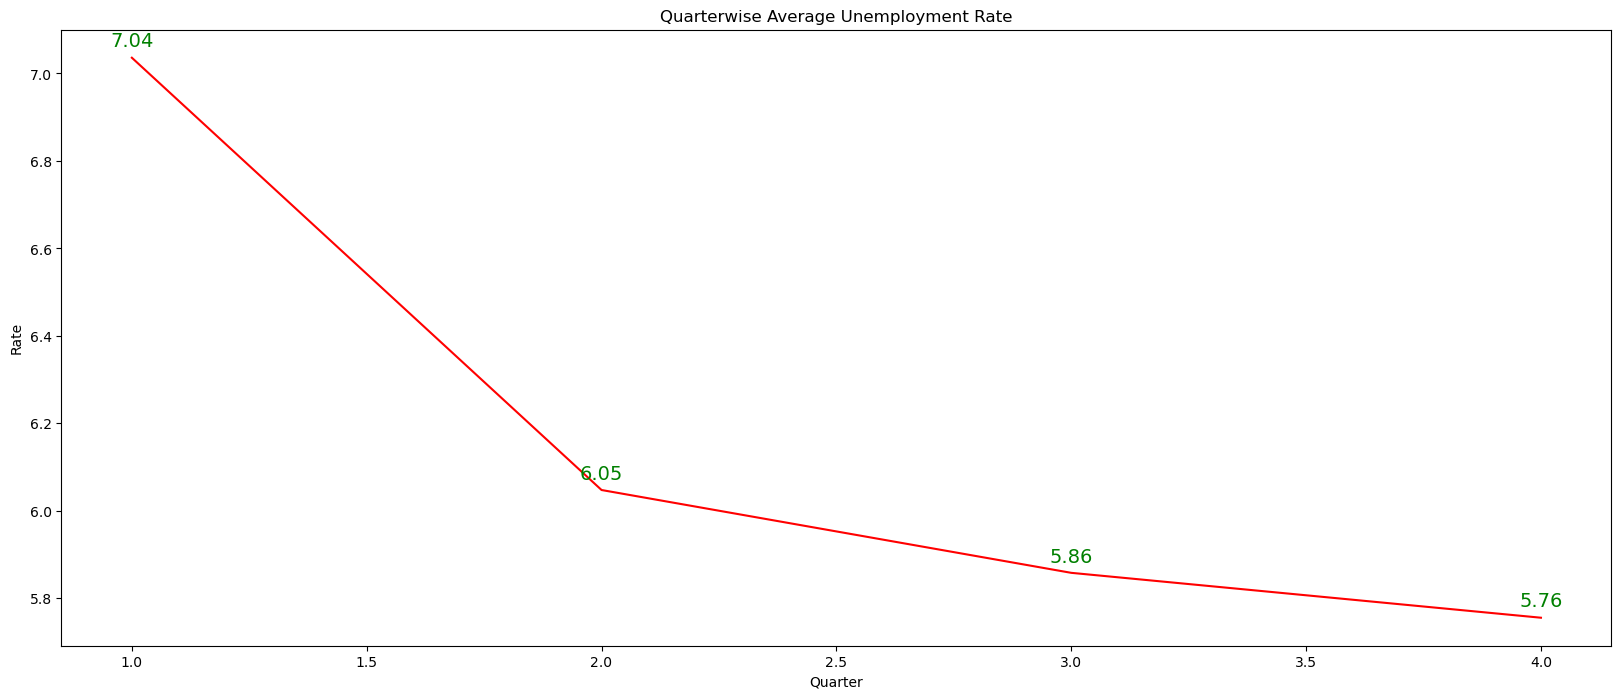

In [35]:
plt.figure(figsize=(20,8))
plt.plot(highest_values.index, highest_values.values,color="red")

plt.xlabel('Quarter')
plt.ylabel('Rate')
plt.title('Quarterwise Average Unemployment Rate')

for x, y in zip(highest_values.index, highest_values.values):
    y= round(float(y),2)
    plt.text(x, y+0.021, str(y), ha='center',color='green',fontsize=14)

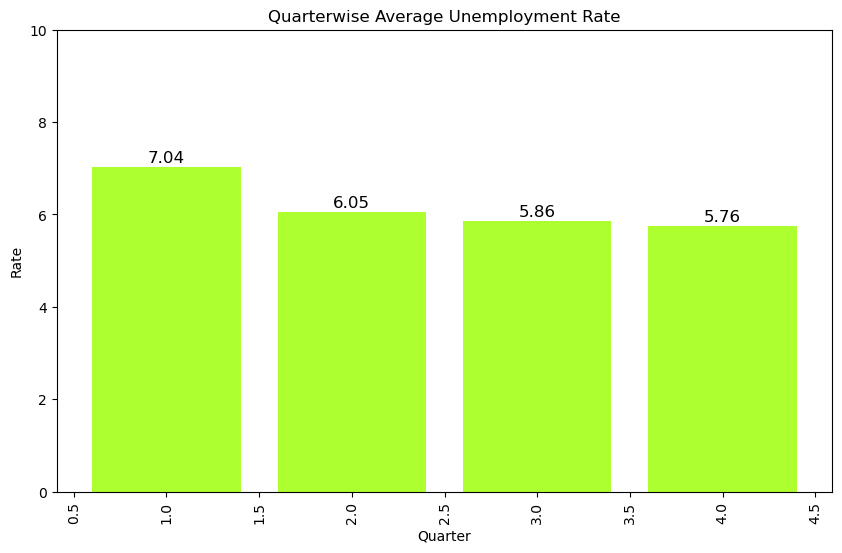

In [36]:
plt.figure(figsize=(10,6))
plt.bar(highest_values.index, highest_values.values,color="greenyellow")

# set the axis labels and title
plt.xlabel('Quarter')
plt.ylabel('Rate')
plt.title('Quarterwise Average Unemployment Rate')

# rotate the x-axis labels for better visibility
plt.xticks(rotation=90)
plt.ylim((0,10))
for i, v in enumerate(highest_values.values):
    plt.text(highest_values.index[i], v+0.1, str(round(v,2)), fontsize=12, color='black', ha='center')
# show the plot
plt.show()

****Yearly Average Unemployment Rate****

In [37]:
highest_values = df.groupby(['Year'])['Rate'].mean()
highest_values

Year
1990    6.093021
1991    7.142391
1992    7.464904
1993    6.924037
1994    6.186649
1995    5.893411
1996    5.912081
1997    5.474520
1998    5.114221
1999    4.873476
2000    4.321123
2001    4.985591
2002    5.720915
2003    6.027990
2004    5.695817
2005    5.438981
2006    4.979263
2007    4.896069
2008    5.759990
2009    8.883838
2010    9.189580
2011    8.523477
2012    7.657544
2013    7.211610
2014    6.096365
2015    5.401873
2016    5.160680
Name: Rate, dtype: float64

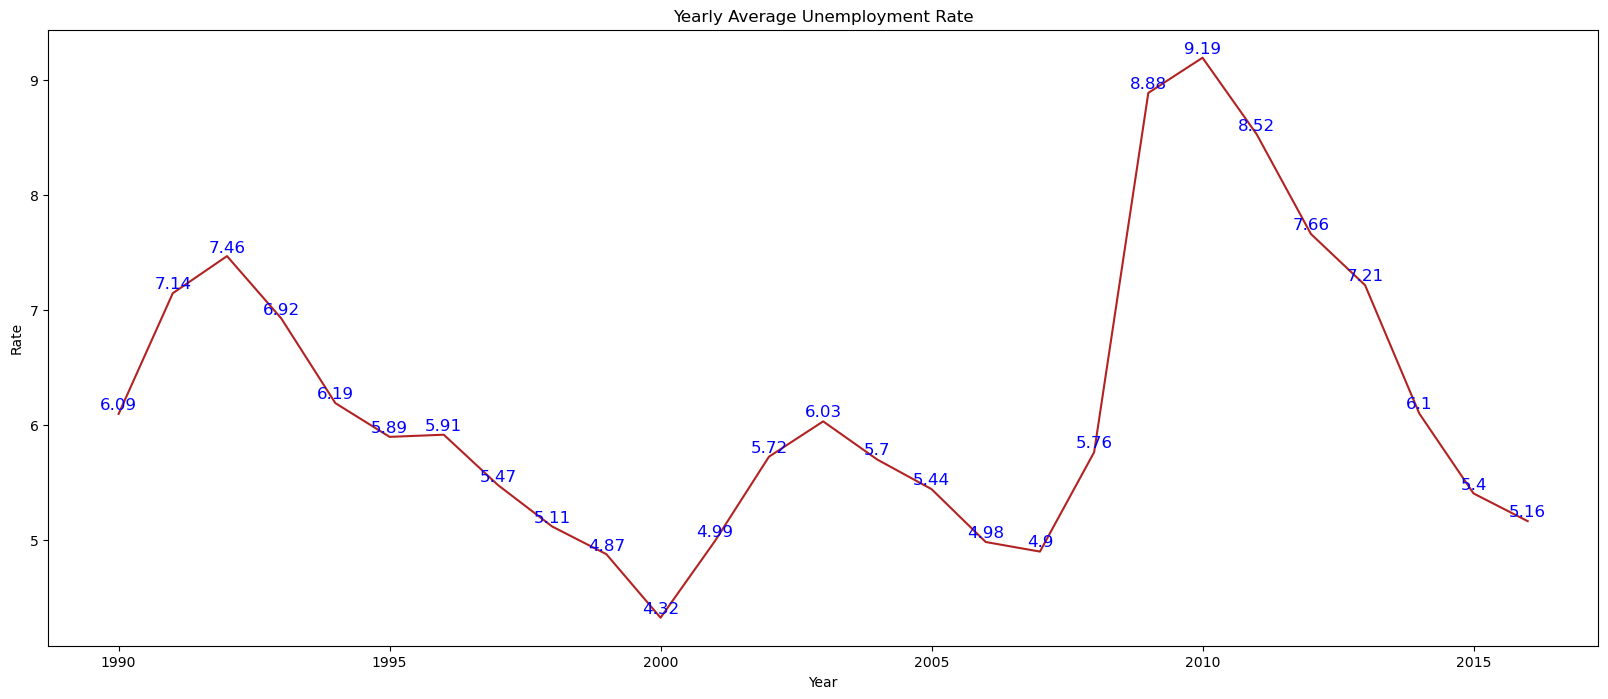

In [38]:
plt.figure(figsize=(20,8))
plt.plot(highest_values.index, highest_values.values, color="firebrick")

plt.xlabel('Year')
plt.ylabel('Rate')
plt.title('Yearly Average Unemployment Rate')

for x, y in zip(highest_values.index, highest_values.values):
    y= round(float(y),2)
    plt.text(x, y+0.04, str(y), ha='center',color='blue',fontsize=12)

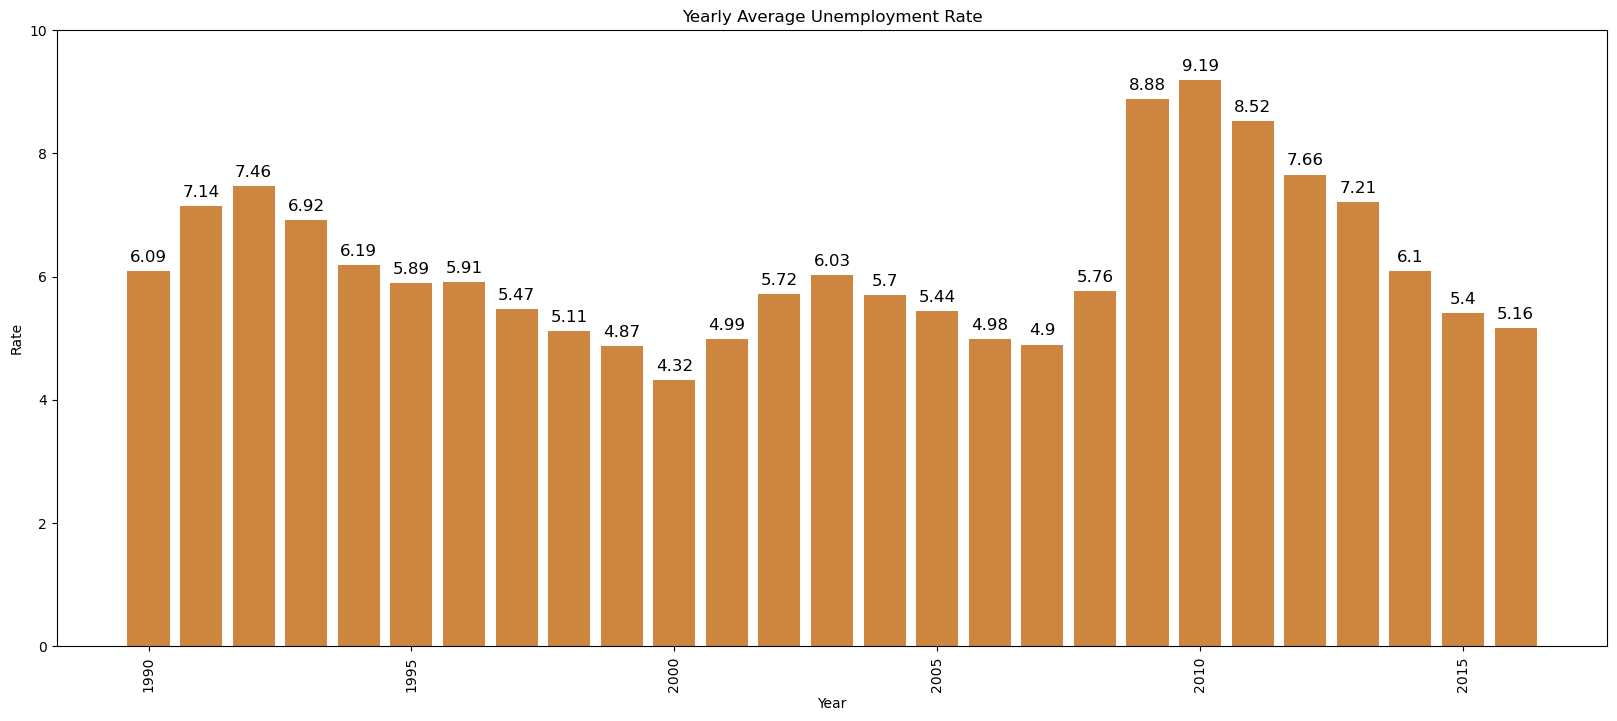

In [39]:
plt.figure(figsize=(20,8))
plt.bar(highest_values.index, highest_values.values,color="peru")

# set the axis labels and title
plt.xlabel('Year')
plt.ylabel('Rate')
plt.title('Yearly Average Unemployment Rate')

# rotate the x-axis labels for better visibility
plt.xticks(rotation=90)
plt.ylim((0,10))
for i, v in enumerate(highest_values.values):
    plt.text(highest_values.index[i], v+0.15, str(round(v,2)), fontsize=12, color='black', ha='center')

# show the plot
plt.show()

****Top 15 County with Average Rate****

In [40]:
highest_values = df.groupby(['County'])['Rate'].mean()
highest_values =highest_values.sort_values(ascending=False)[:15]
highest_values

County
Imperial County        23.102749
Starr County           20.932159
Presidio County        20.335683
Maverick County        19.669604
Luna County            17.909877
Zavala County          16.937004
Colusa County          16.622337
East Carroll Parish    15.788119
Willacy County         15.736123
Wilcox County          15.100926
Apache County          14.242901
Mora County            14.199074
West Carroll Parish    14.180198
Magoffin County        14.174587
Montmorency County     13.763014
Name: Rate, dtype: float64

In [41]:
top_15_county = highest_values.index
top_15_county

Index(['Imperial County', 'Starr County', 'Presidio County', 'Maverick County',
       'Luna County', 'Zavala County', 'Colusa County', 'East Carroll Parish',
       'Willacy County', 'Wilcox County', 'Apache County', 'Mora County',
       'West Carroll Parish', 'Magoffin County', 'Montmorency County'],
      dtype='object', name='County')

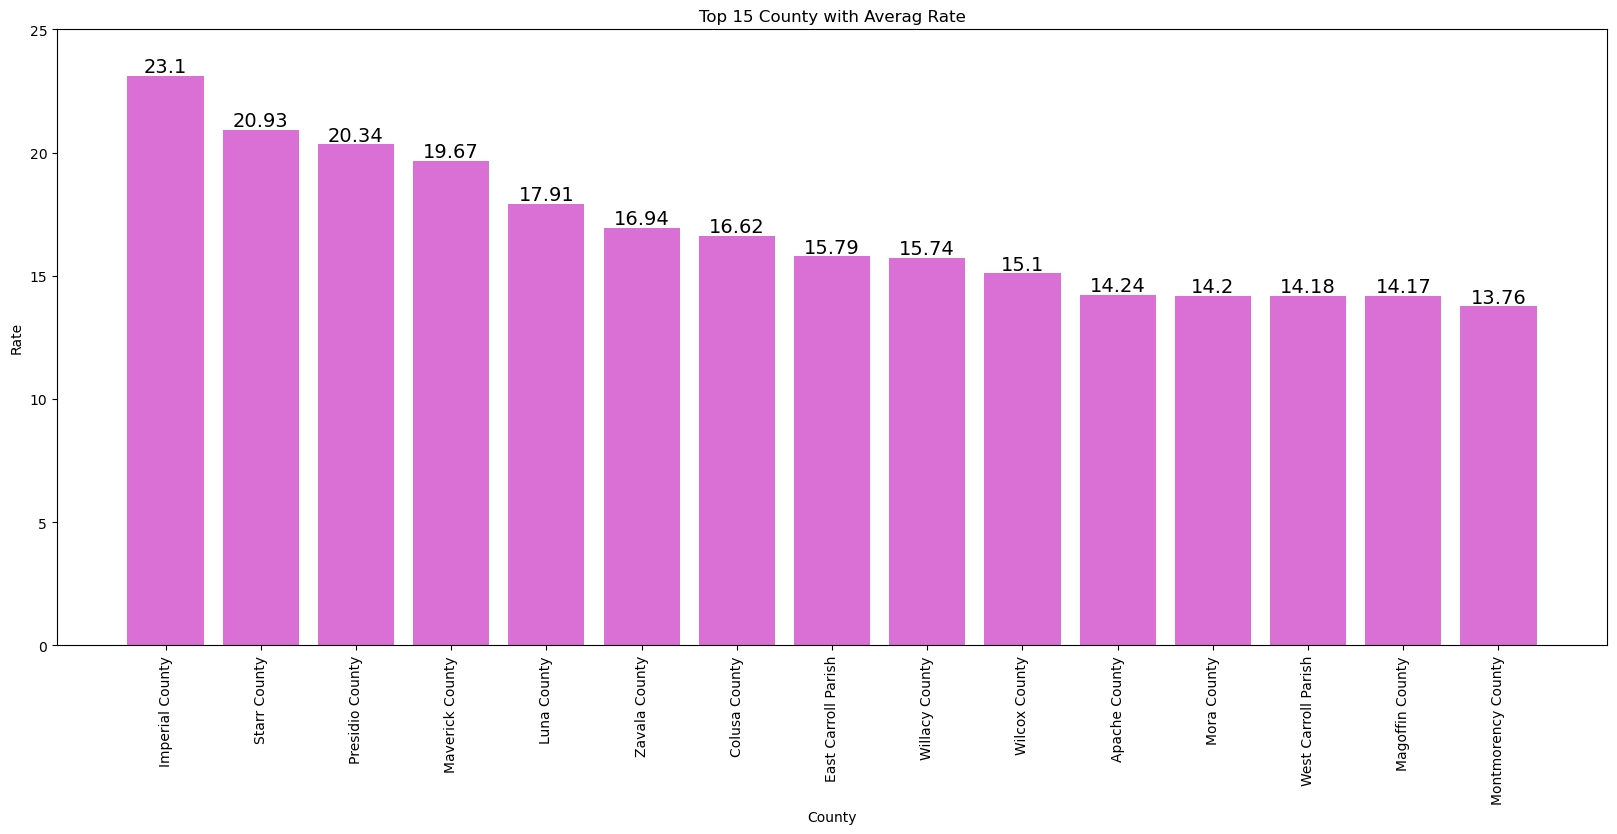

In [42]:
plt.figure(figsize=(20,8))
plt.bar(highest_values.index, highest_values.values,color="orchid")

# set the axis labels and title
plt.xlabel('County')
plt.ylabel('Rate')
plt.title('Top 15 County with Averag Rate')

# rotate the x-axis labels for better visibility
plt.xticks(rotation=90)
plt.ylim((0,25))
for i, v in enumerate(highest_values.values):
    plt.text(highest_values.index[i], v+0.15, str(round(v,2)), fontsize=14, color='black', ha='center')

# show the plot
plt.show()

****Top 10 Sates with Average Rate****

In [43]:
highest_values = df.groupby(['State'])['Rate'].mean()
highest_values =highest_values.sort_values(ascending=False)[:10]
highest_values

State
Arizona           9.274588
California        9.045005
Mississippi       8.320517
Michigan          8.136136
West Virginia     8.104809
Washington        8.031513
South Carolina    7.978737
Oregon            7.849271
Louisiana         7.812949
Alabama           7.723844
Name: Rate, dtype: float64

In [44]:
top_10_states = highest_values.index
top_10_states

Index(['Arizona', 'California', 'Mississippi', 'Michigan', 'West Virginia',
       'Washington', 'South Carolina', 'Oregon', 'Louisiana', 'Alabama'],
      dtype='object', name='State')

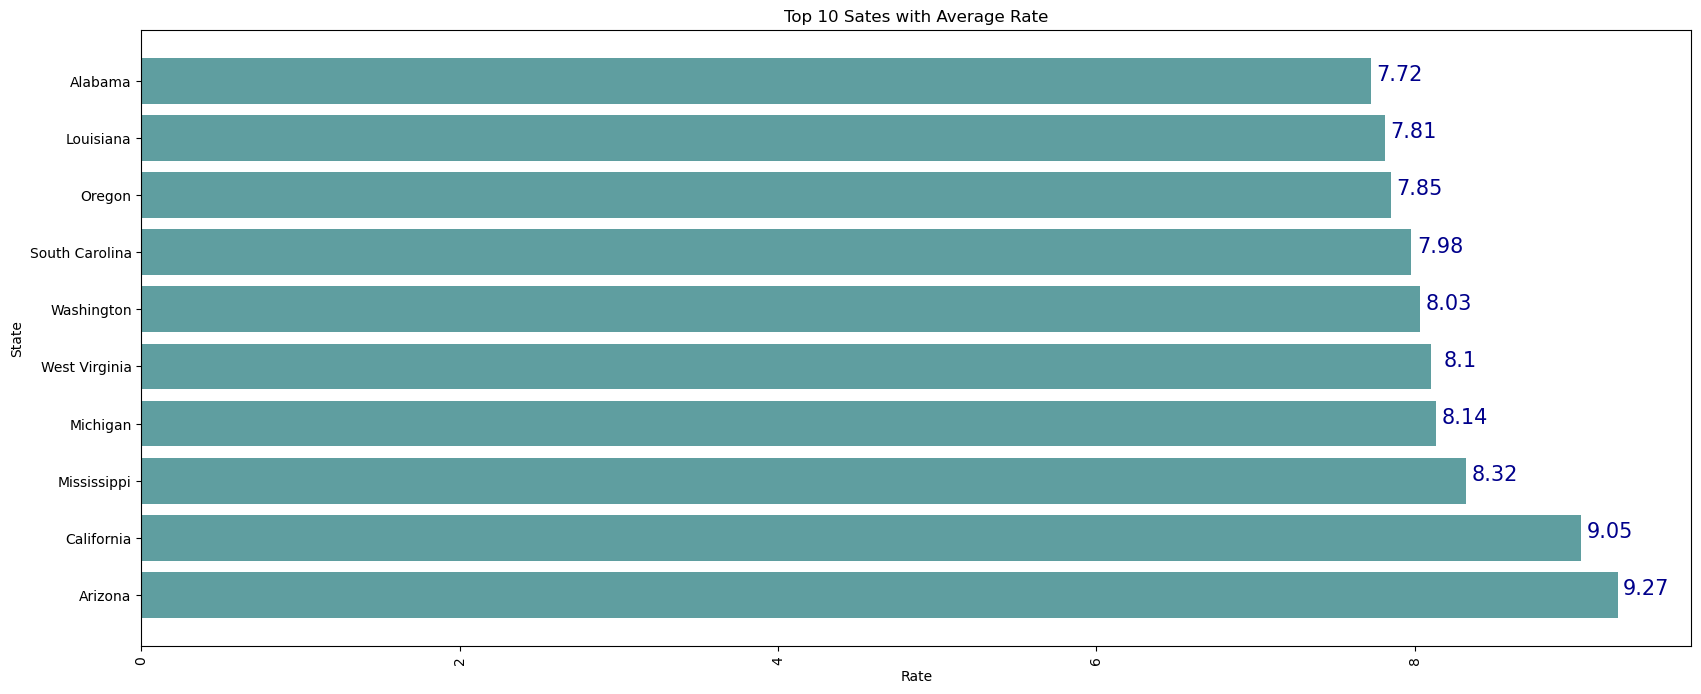

In [45]:
plt.figure(figsize=(20,8))
plt.barh(highest_values.index, highest_values.values,color="cadetblue")

# set the axis labels and title
plt.xlabel('Rate')
plt.ylabel('State')
plt.title('Top 10 Sates with Average Rate')

# rotate the x-axis labels for better visibility
plt.xticks(rotation=90)
# for i, v in enumerate(highest_values.values):
#     plt.text(highest_values.index[i], v+0.15, str(round(v,2)), fontsize=14, color='red', ha='center')
for i, v in enumerate(highest_values.values):
    plt.text(v+0.18,highest_values.index[i],str(round(v,2)), fontsize=15, color='darkblue', ha='center')
# show the plot
plt.show()

****Compairing Rate Century wise****

In [46]:
df_20_century = df[df.Year >= 2000]
df_20_century.head()

,Year,Month,State,County,Rate,Quarter,year_z_score,rate_z_score
0,2015,February,Mississippi,Newton County,6.1,1,1.533566,-0.024099
1,2015,February,Mississippi,Panola County,9.4,1,1.533566,1.036130
2,2015,February,Mississippi,Monroe County,7.9,1,1.533566,0.554208
3,2015,February,Mississippi,Hinds County,6.1,1,1.533566,-0.024099
4,2015,February,Mississippi,Kemper County,10.6,1,1.533566,1.421669


In [47]:
df_19_century = df[df.Year < 2000]
df_19_century.head()

,Year,Month,State,County,Rate,Quarter,year_z_score,rate_z_score
238076,1991,February,Mississippi,Newton County,6.9,1,-1.53357,0.232926
238077,1991,February,Mississippi,Panola County,10.2,1,-1.53357,1.293156
238078,1991,February,Mississippi,Monroe County,11.3,1,-1.53357,1.646566
238079,1991,February,Mississippi,Hinds County,6.6,1,-1.53357,0.136542
238080,1991,February,Mississippi,Kemper County,10.5,1,-1.53357,1.389540


****Month Wise****

In [48]:
year_20_century = df_20_century.groupby(['Month'])['Rate'].mean()
year_20_century = year_20_century.reset_index()
year_20_century.index=pd.CategoricalIndex(year_20_century['Month'],categories=new_order,ordered=True)
year_20_century=year_20_century.sort_index().reset_index(drop=True)
year_20_century= year_20_century.set_index("Month")
year_20_century

,Rate
Month,
January,7.117721
February,7.009526
March,6.715785
April,5.971718
May,5.922215
June,6.323440
July,6.281733
August,6.007207
September,5.699531


In [49]:
year_19_century = df_19_century.groupby(['Month'])['Rate'].mean()
year_19_century = year_19_century.reset_index()
year_19_century.index=pd.CategoricalIndex(year_19_century['Month'],categories=new_order,ordered=True)
year_19_century=year_19_century.sort_index().reset_index(drop=True)
year_19_century= year_19_century.set_index("Month")
year_19_century

,Rate
Month,
January,7.378556
February,7.276687
March,6.903517
April,6.078455
May,5.777284
June,6.158979
July,5.954647
August,5.597750
September,5.327330


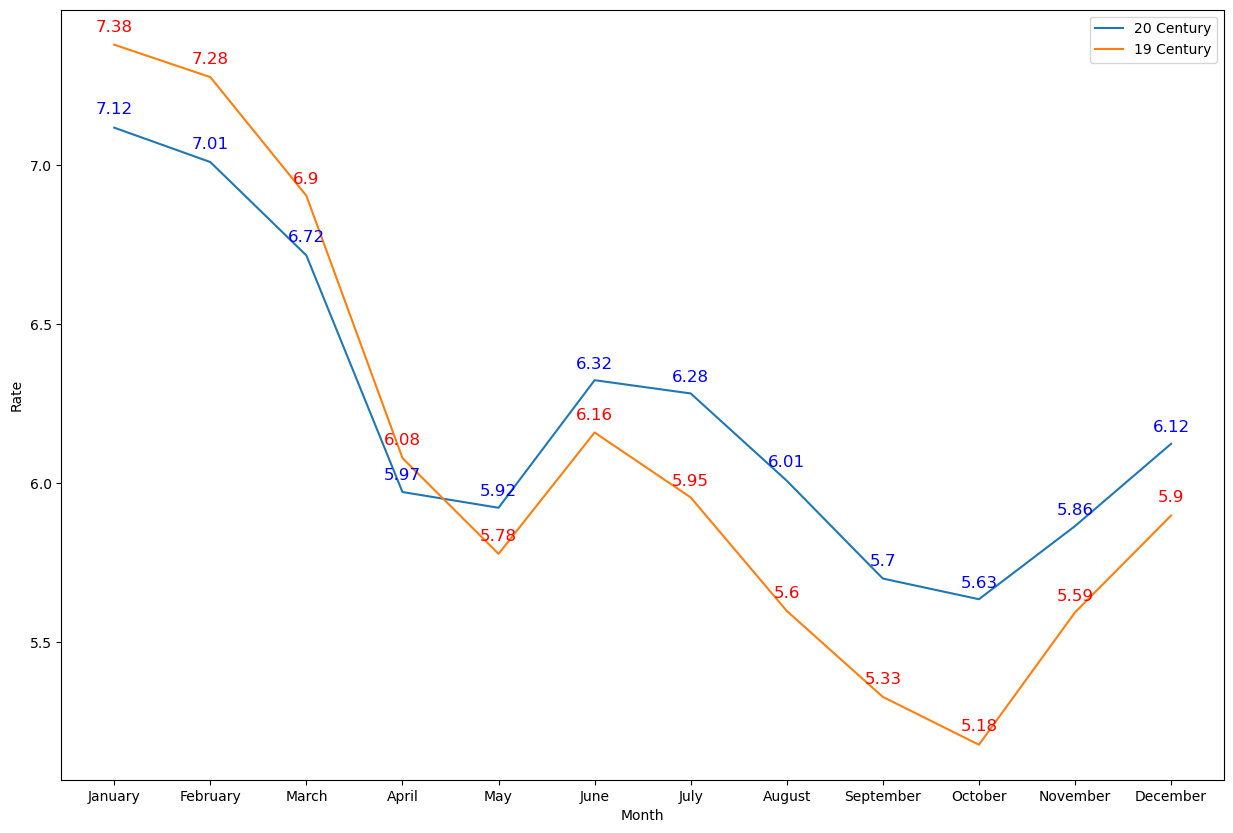

In [50]:
# Plotting columns from df1 and df2
plt.figure(figsize=(15, 10))

# Plotting column from df1
plt.plot(year_20_century.index, year_20_century.values, label='20 Century')
for x, y in zip(year_20_century.index, year_20_century.values):
    y= round(float(y),2)
    plt.text(x, y+0.04, str(y), ha='center',color='blue',fontsize=12)

# Plotting column from df2
plt.plot(year_19_century.index, year_19_century.values , label='19 Century')
for x, y in zip(year_19_century.index, year_19_century.values):
    y= round(float(y),2)
    plt.text(x, y+0.04, str(y), ha='center',color='red',fontsize=12)

# Setting the axis labels
plt.xlabel('Month')
plt.ylabel('Rate')

# Adding a legend
plt.legend()

# Displaying the plot
plt.show()

****Quarter wise****

In [51]:
quarter_20_century = df_20_century.groupby(['Quarter'])['Rate'].mean()
quarter_19_century = df_19_century.groupby(['Quarter'])['Rate'].mean()

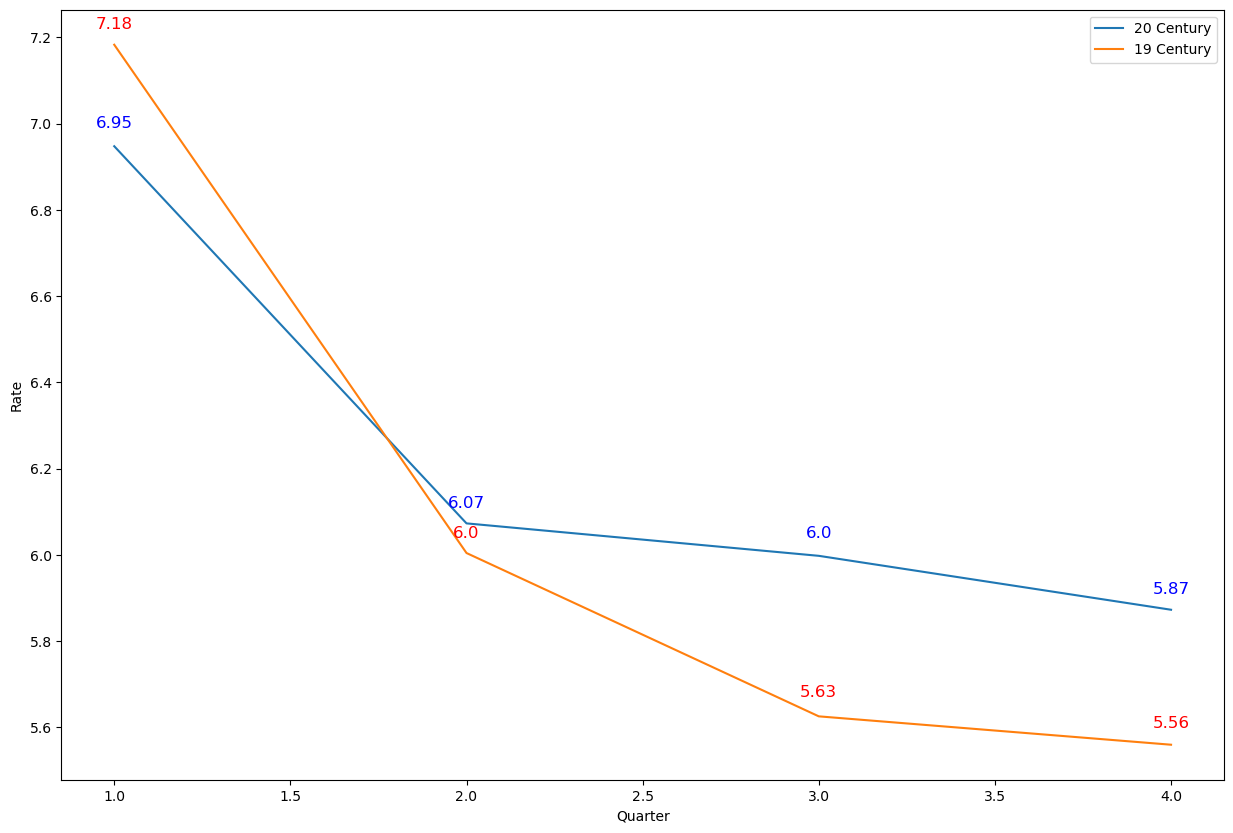

In [52]:
# Plotting columns from df1 and df2
plt.figure(figsize=(15, 10))

# Plotting column from df1
plt.plot(quarter_20_century.index, quarter_20_century.values, label='20 Century')
for x, y in zip(quarter_20_century.index, quarter_20_century.values):
    y= round(float(y),2)
    plt.text(x, y+0.04, str(y), ha='center',color='blue',fontsize=12)

# Plotting column from df2
plt.plot(quarter_19_century.index, quarter_19_century.values , label='19 Century')
for x, y in zip(quarter_19_century.index, quarter_19_century.values):
    y= round(float(y),2)
    plt.text(x, y+0.04, str(y), ha='center',color='red',fontsize=12)

# Setting the axis labels
plt.xlabel('Quarter')
plt.ylabel('Rate')

# Adding a legend
plt.legend()

# Displaying the plot
plt.show()

****State wise****

In [53]:
def get_state_name(state):
    if state in top_10_states:
        return True
    else:
        return False

In [54]:
state_20_century = df_20_century[df_20_century.State.apply(lambda x:get_state_name(x))]
top_10_state_20_century = state_20_century.groupby(['State'])['Rate'].mean()

state_19_century = df_19_century[df_19_century.State.apply(lambda x:get_state_name(x))]
top_10_state_19_century = state_19_century.groupby(['State'])['Rate'].mean()

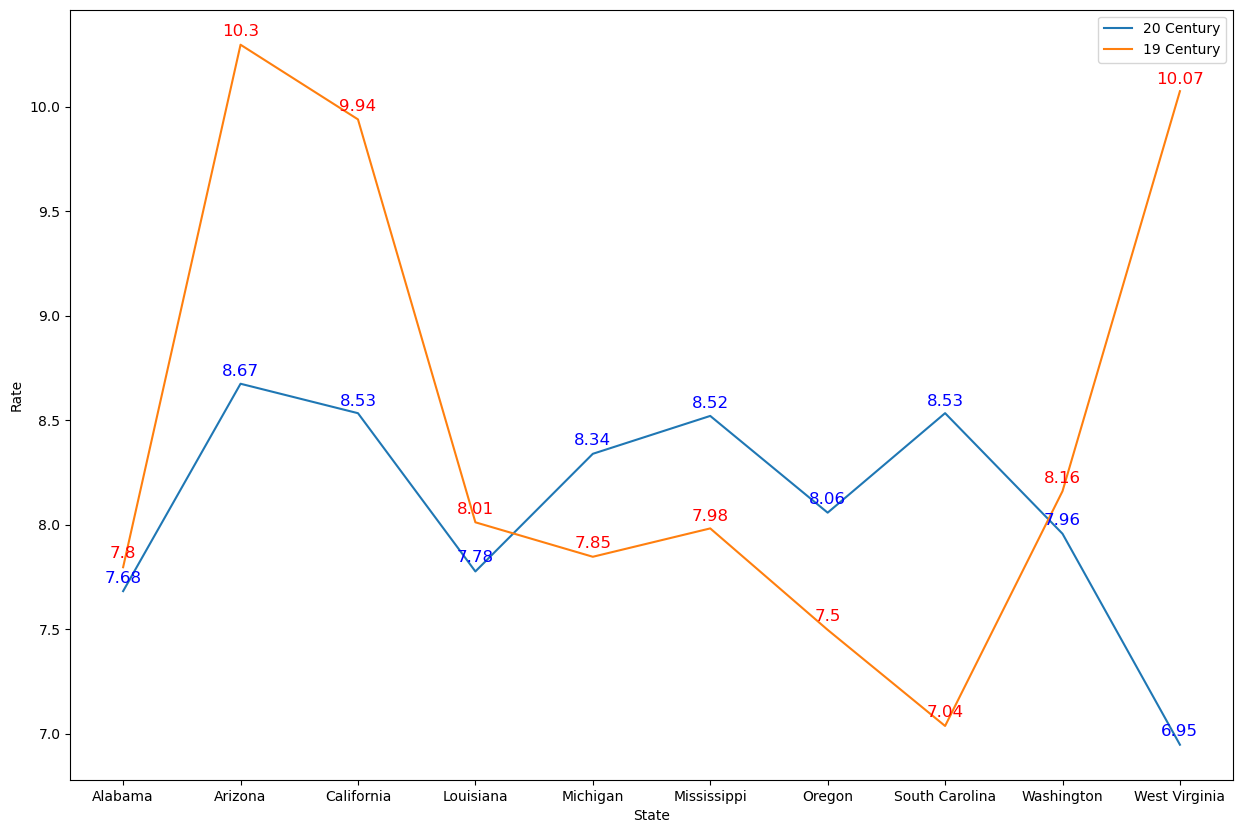

In [55]:
# Plotting columns from df1 and df2
plt.figure(figsize=(15, 10))

# Plotting column from df1
plt.plot(top_10_state_20_century.index, top_10_state_20_century.values, label='20 Century')
for x, y in zip(top_10_state_20_century.index, top_10_state_20_century.values):
    y= round(float(y),2)
    plt.text(x, y+0.04, str(y), ha='center',color='blue',fontsize=12)

# Plotting column from df2
plt.plot(top_10_state_19_century.index, top_10_state_19_century.values , label='19 Century')
for x, y in zip(top_10_state_19_century.index, top_10_state_19_century.values):
    y= round(float(y),2)
    plt.text(x, y+0.04, str(y), ha='center',color='red',fontsize=12)

# Setting the axis labels
plt.xlabel('State')
plt.ylabel('Rate')

# Adding a legend
plt.legend()

# Displaying the plot
plt.show()

****County wise****

In [56]:
def get_county_name(county):
    if county in top_15_county:
        return True
    else:
        return False

In [57]:
county_20_century = df_20_century[df_20_century.County.apply(lambda x:get_county_name(x))]
top_15_county_20_century = county_20_century.groupby(['County'])['Rate'].mean()

county_19_century = df_19_century[df_19_century.County.apply(lambda x:get_county_name(x))]
top_15_county_19_century = county_19_century.groupby(['County'])['Rate'].mean()

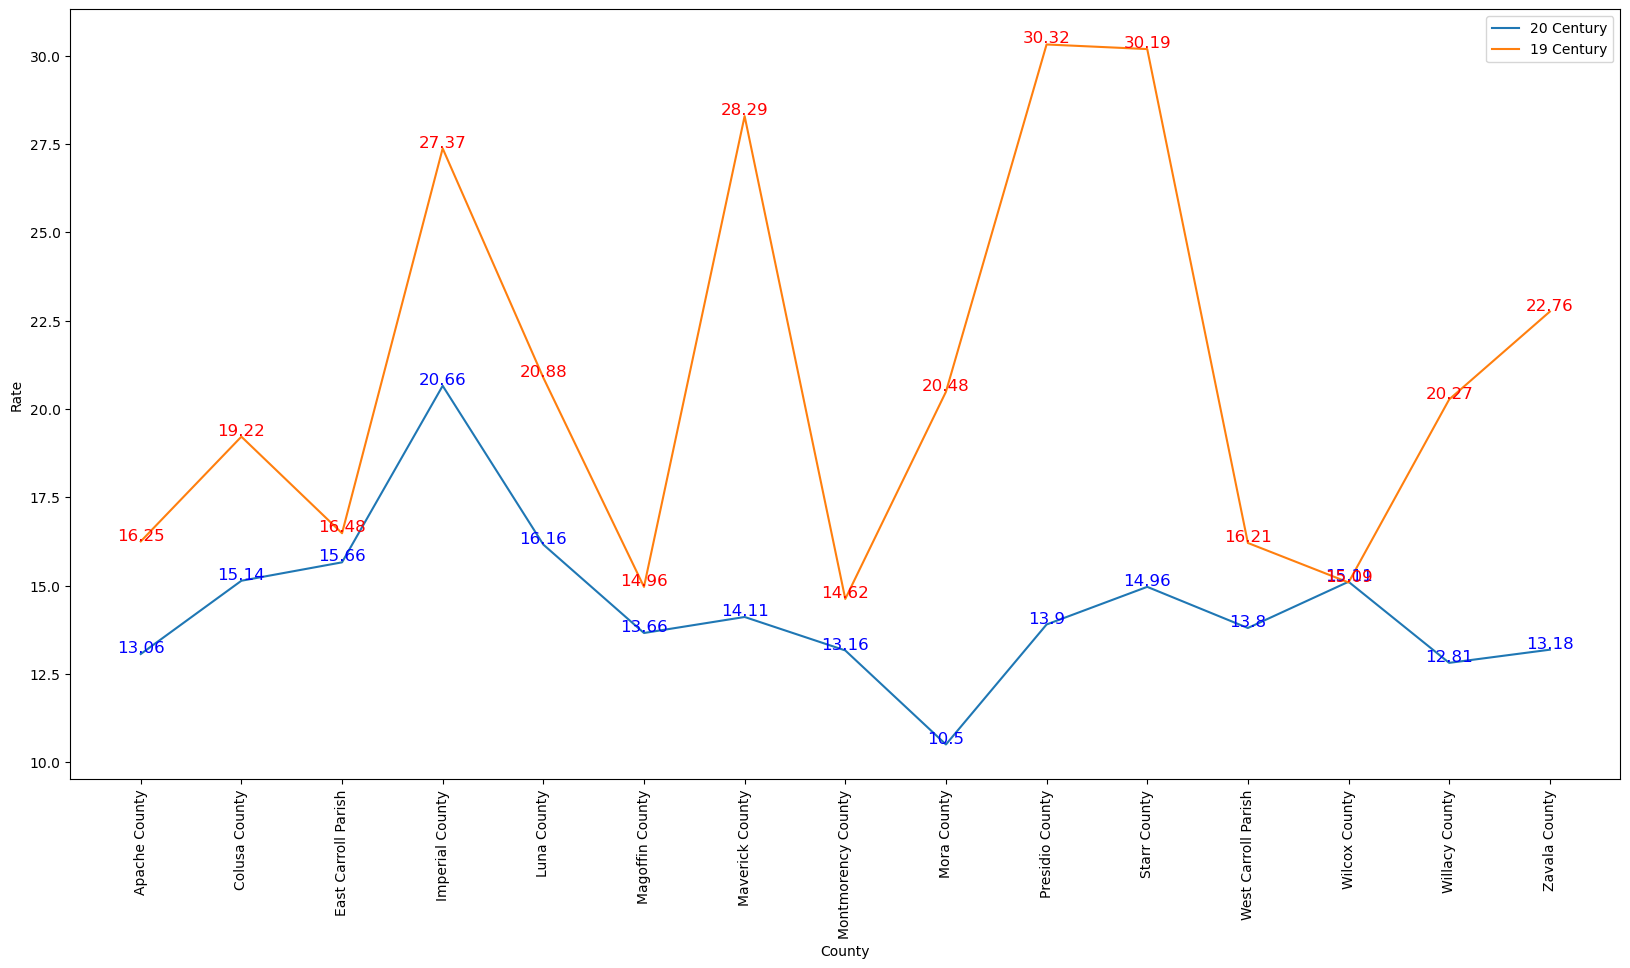

In [58]:
# Plotting columns from df1 and df2
plt.figure(figsize=(20, 10))

# Plotting column from df1
plt.plot(top_15_county_20_century.index, top_15_county_20_century.values, label='20 Century')
for x, y in zip(top_15_county_20_century.index, top_15_county_20_century.values):
    y= round(float(y),2)
    plt.text(x, y+0.04, str(y), ha='center',color='blue',fontsize=12)

# Plotting column from df2
plt.plot(top_15_county_19_century.index, top_15_county_19_century.values , label='19 Century')
for x, y in zip(top_15_county_19_century.index, top_15_county_19_century.values):
    y= round(float(y),2)
    plt.text(x, y+0.04, str(y), ha='center',color='red',fontsize=12)

# Setting the axis labels
plt.xlabel('County')
plt.ylabel('Rate')
plt.xticks(rotation=90)

# Adding a legend
plt.legend()

# Displaying the plot
plt.show()

****Analzing Year with Highest Rate i.e. 2010****

In [59]:
df_2010 = df[df.Year==2010]
df_2010.head()

,Year,Month,State,County,Rate,Quarter,year_z_score,rate_z_score
136792,2010,February,Mississippi,Newton County,10.5,1,0.894579,1.389540
136793,2010,February,Mississippi,Panola County,15.0,1,0.894579,2.835308
136794,2010,February,Mississippi,Monroe County,14.3,1,0.894579,2.610411
136795,2010,February,Mississippi,Hinds County,10.4,1,0.894579,1.357412
136796,2010,February,Mississippi,Kemper County,14.5,1,0.894579,2.674667


In [60]:
year_2010_rate = df_2010.groupby(['State'])['Rate'].mean()
year_2010_rate = year_2010_rate.sort_values(ascending=False)[:15]

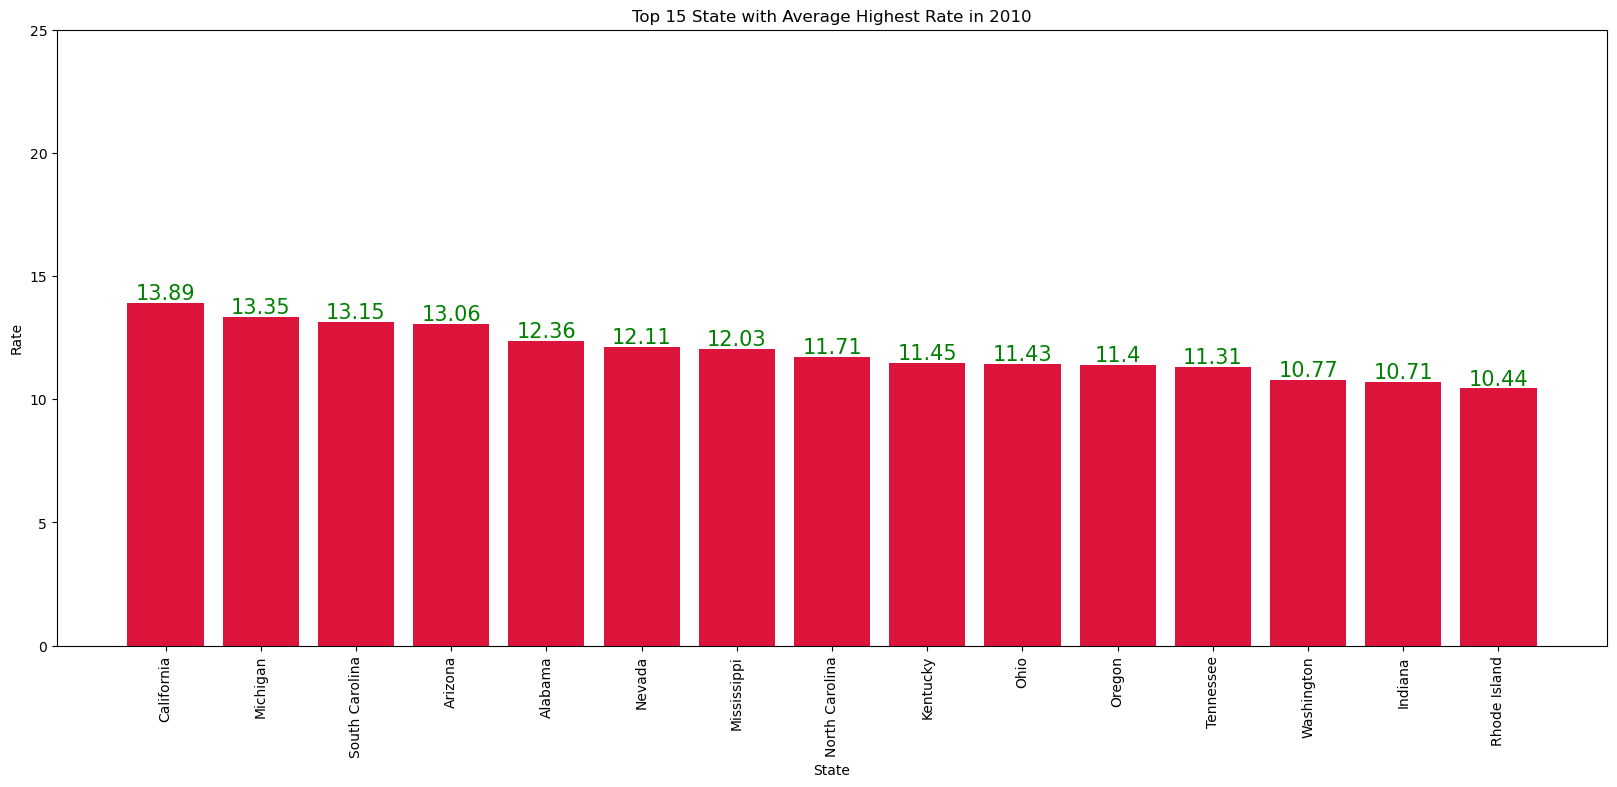

In [61]:
plt.figure(figsize=(20,8))
plt.bar(year_2010_rate.index, year_2010_rate.values,color="crimson")

# set the axis labels and title
plt.xlabel('State')
plt.ylabel('Rate')
plt.title('Top 15 State with Average Highest Rate in 2010')

# rotate the x-axis labels for better visibility
plt.xticks(rotation=90)
plt.ylim((0,25))
for i, v in enumerate(year_2010_rate.values):
    plt.text(year_2010_rate.index[i], v+0.15, str(round(v,2)), fontsize=15, color='green', ha='center')

# show the plot
plt.show()

****California has highest Rate in 2010****

****Analyzing California in 2010****

In [75]:
df_2010_california = df_2010[df_2010.State=="California"]
df_2010_california.head()

,Year,Month,State,County,Rate,Quarter,year_z_score,rate_z_score
138157,2010,February,California,Humboldt County,11.3,1,0.894579,1.646566
138158,2010,February,California,Sonoma County,11.5,1,0.894579,1.710822
138159,2010,February,California,San Luis Obispo County,10.2,1,0.894579,1.293156
138160,2010,February,California,Glenn County,17.6,1,0.894579,3.670641
138161,2010,February,California,Nevada County,12.1,1,0.894579,1.903591


In [76]:
california_2010_county_rate = df_2010_california.groupby(['County'])['Rate'].mean()
california_2010_county_rate = california_2010_county_rate.sort_values(ascending=False)[:15]
california_2010_county_rate

County
Imperial County       28.61
Colusa County         21.36
Plumas County         18.57
Sutter County         18.55
Merced County         18.06
Yuba County           17.85
Tulare County         17.34
Trinity County        17.24
Siskiyou County       17.04
Stanislaus County     16.97
Shasta County         16.87
Fresno County         16.83
Madera County         16.64
San Joaquin County    16.54
Kings County          16.28
Name: Rate, dtype: float64

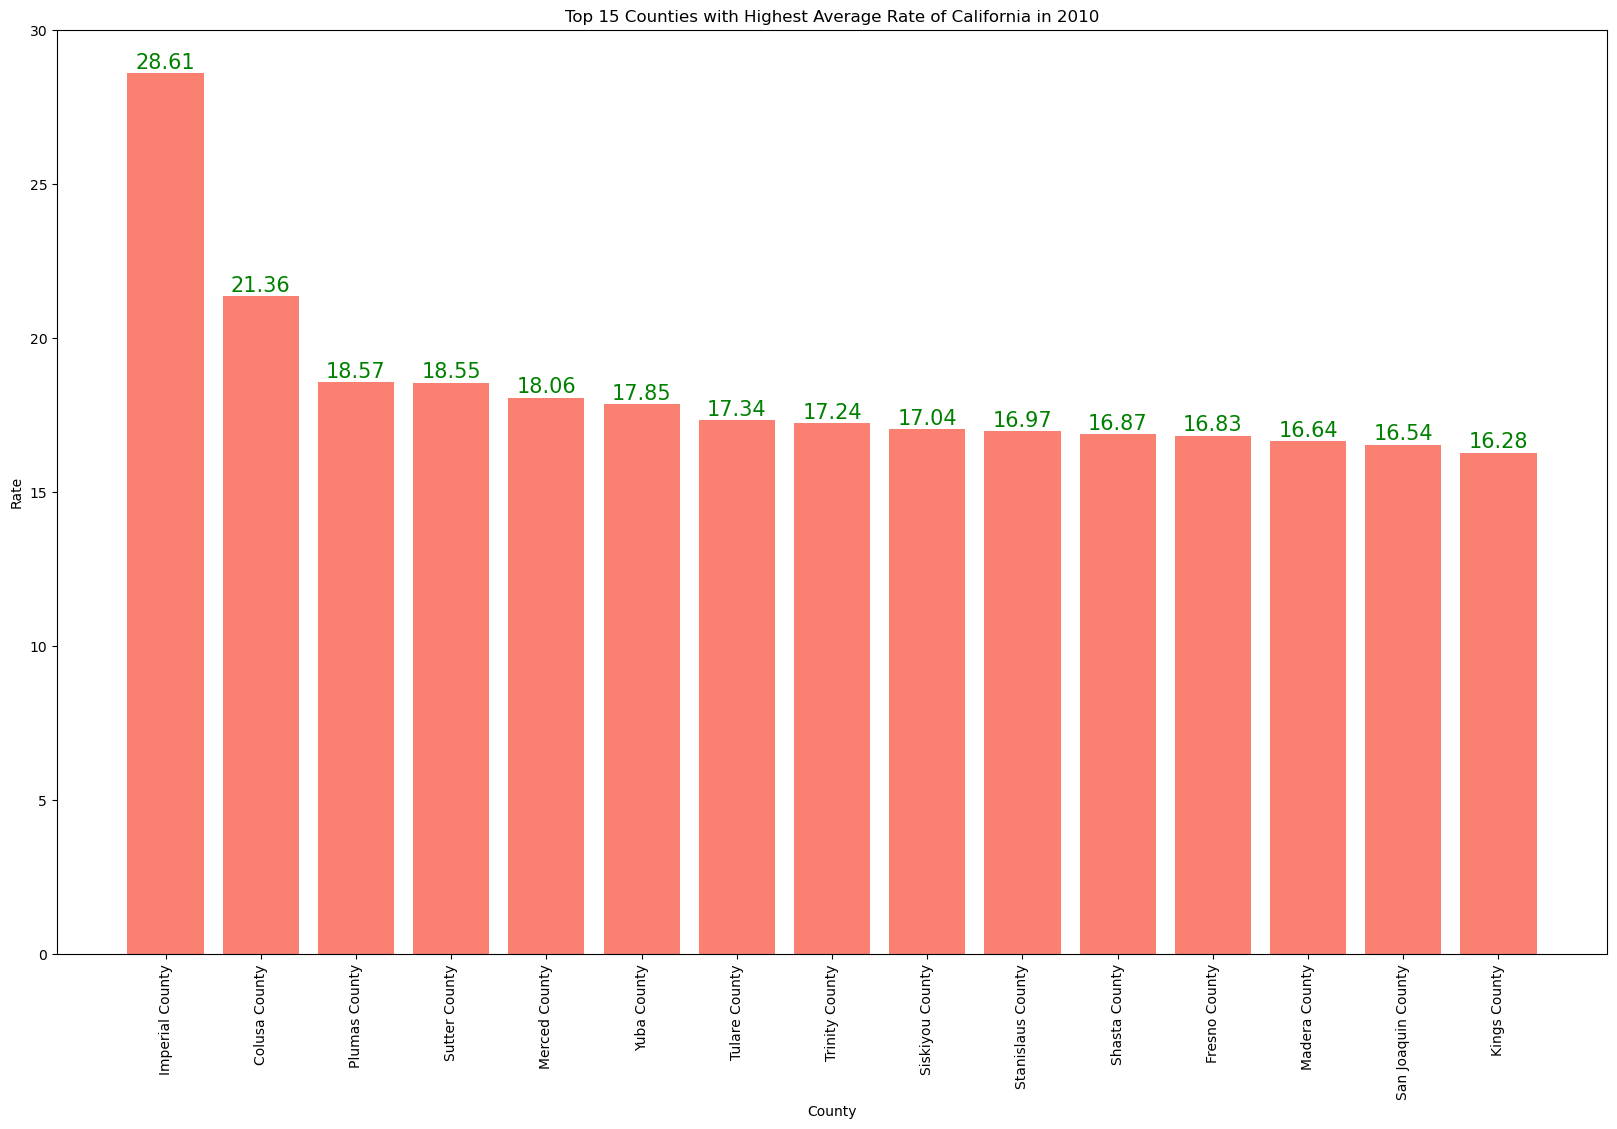

In [78]:
plt.figure(figsize=(20,12))
plt.bar(california_2010_county_rate.index, california_2010_county_rate.values,color="salmon")

# set the axis labels and title
plt.xlabel('County')
plt.ylabel('Rate')
plt.title('Top 15 Counties with Highest Average Rate of California in 2010')

# rotate the x-axis labels for better visibility
plt.xticks(rotation=90)
plt.ylim((0,30))
for i, v in enumerate(california_2010_county_rate.values):
    plt.text(california_2010_county_rate.index[i], v+0.15, str(round(v,2)), fontsize=15, color='green', ha='center')

# show the plot
plt.show()

****Imperial County has highest rate for California Sate in 2010****

****Analyzing Imperial County in 2010****

In [83]:
df_imperial_county =  df_2010_california[df_2010_california.County=="Imperial County"]
df_imperial_county.head()

,Year,Month,State,County,Rate,Quarter,year_z_score,rate_z_score
138183,2010,February,California,Imperial County,26.7,1,0.894579,6.594304
141068,2010,October,California,Imperial County,30.5,4,0.894579,7.815175
143953,2010,March,California,Imperial County,26.1,1,0.894579,6.401535
149665,2010,May,California,Imperial County,28.2,2,0.894579,7.076227
152550,2010,January,California,Imperial County,26.5,1,0.894579,6.530048


In [104]:
imperial_county_2010_rate_quarterly = df_imperial_county.groupby(['Quarter'])['Rate'].mean()
imperial_county_2010_rate_quarterly = imperial_county_2010_rate_quarterly.sort_values(ascending=False)
imperial_county_2010_rate_quarterly

Quarter
3    31.100000
4    29.400000
2    28.200000
1    26.433333
Name: Rate, dtype: float64

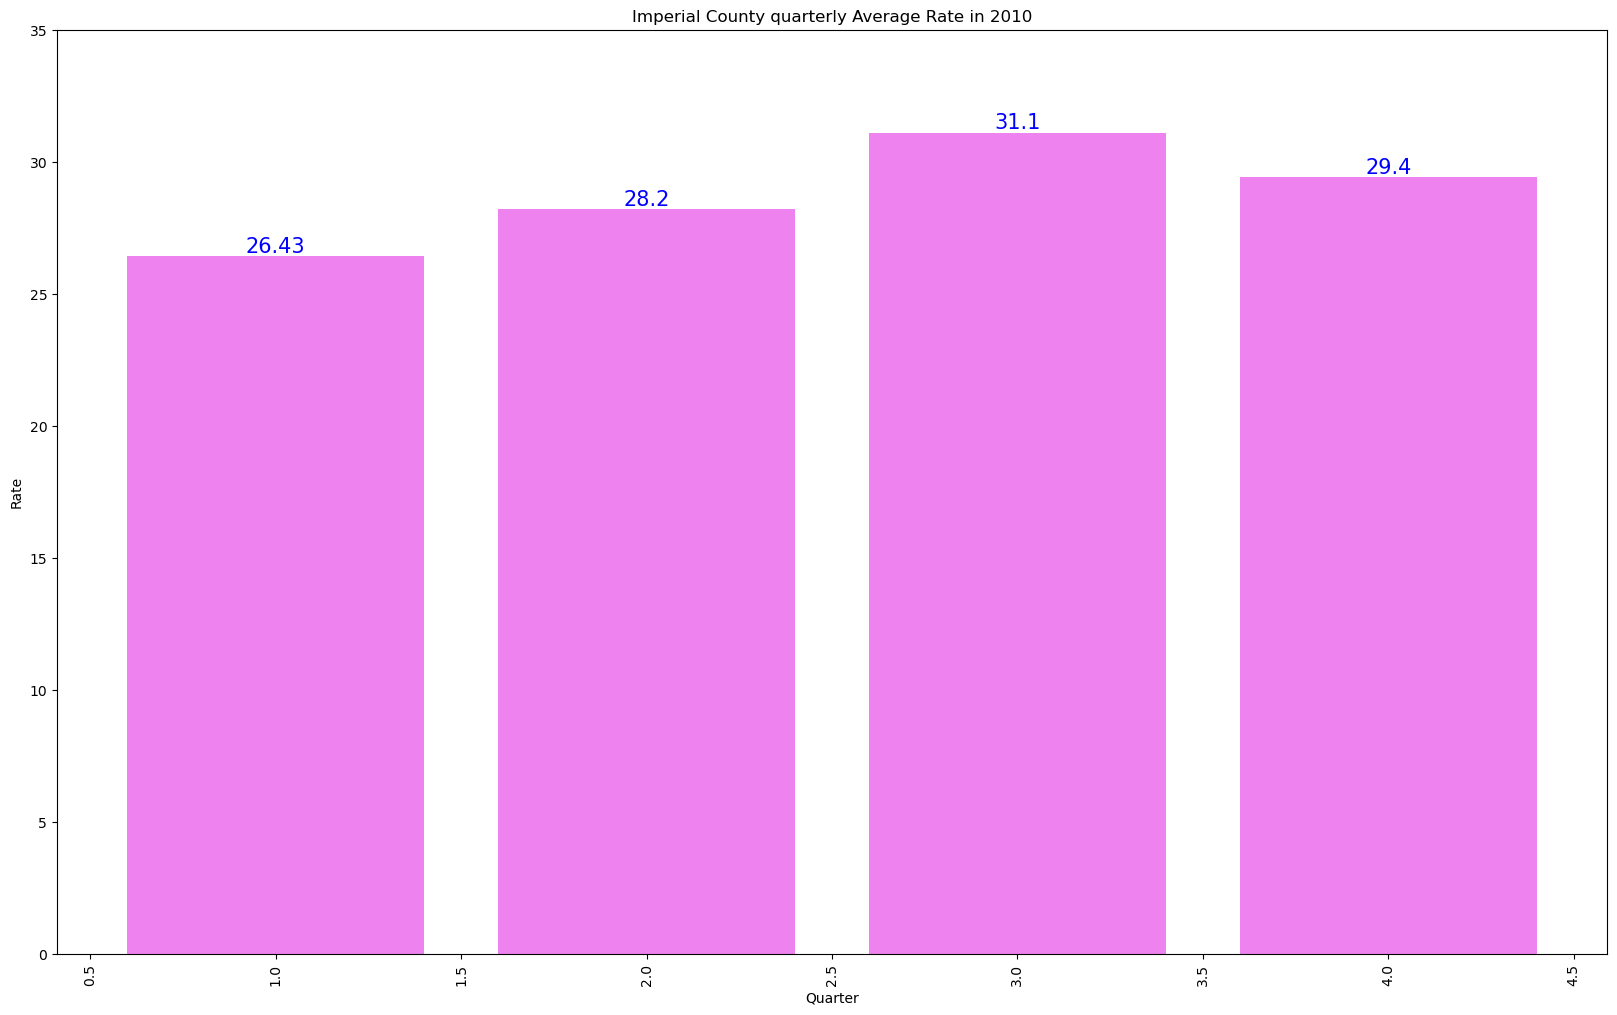

In [106]:
plt.figure(figsize=(20,12))
plt.bar(imperial_county_2010_rate_quarterly.index, imperial_county_2010_rate_quarterly.values,color="violet")

# set the axis labels and title
plt.xlabel('Quarter')
plt.ylabel('Rate')
plt.title('Imperial County quarterly Average Rate in 2010')

# rotate the x-axis labels for better visibility
plt.xticks(rotation=90)
plt.ylim((0,35))
for i, v in enumerate(imperial_county_2010_rate_quarterly.values):
    plt.text(imperial_county_2010_rate_quarterly.index[i], v+0.15, str(round(v,2)), fontsize=15, color='blue', ha='center')

# show the plot
plt.show()

****Unemployment rate is around to 30 in third and fourth quarter, which is very high.****

In [90]:
imperial_county_2010_rate = df_imperial_county.groupby(['Month'])['Rate'].mean()
imperial_county_2010_rate = imperial_county_2010_rate.sort_values(ascending=False)
imperial_county_2010_rate

Month
July         31.3
September    30.9
October      30.5
November     29.9
June         28.2
May          28.2
December     27.8
February     26.7
January      26.5
March        26.1
Name: Rate, dtype: float64

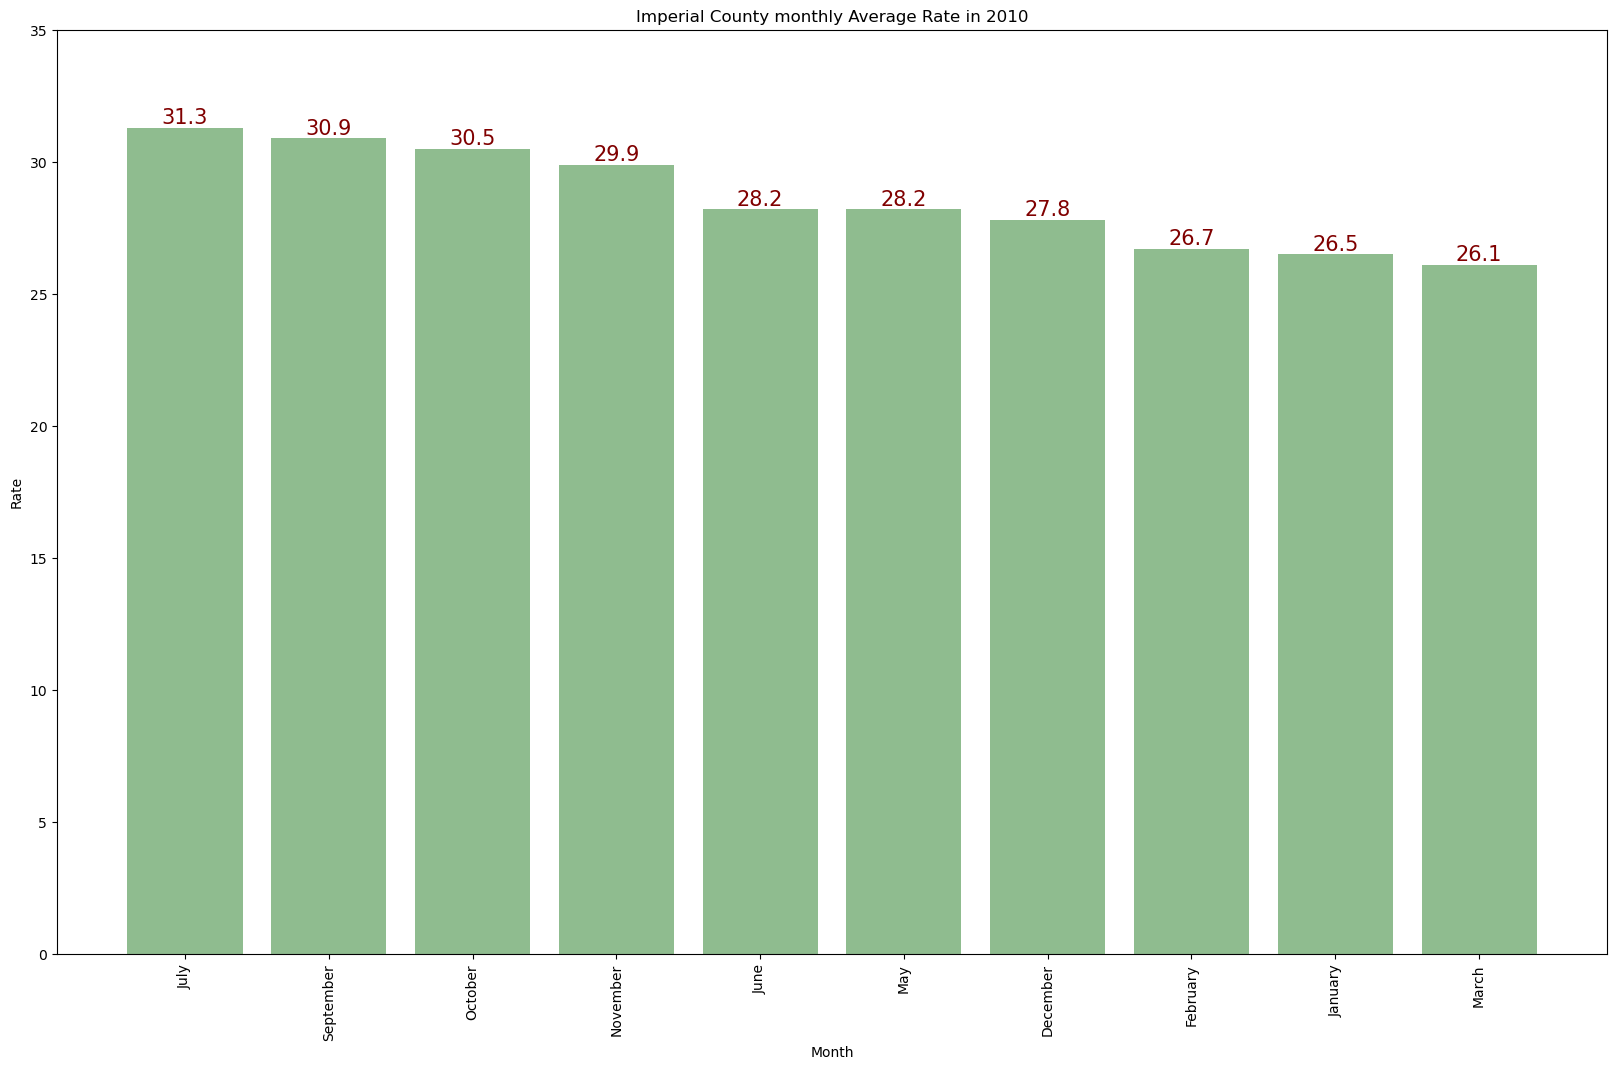

In [103]:
plt.figure(figsize=(20,12))
plt.bar(imperial_county_2010_rate.index, imperial_county_2010_rate.values,color="darkseagreen")

# set the axis labels and title
plt.xlabel('Month')
plt.ylabel('Rate')
plt.title('Imperial County monthly Average Rate in 2010')

# rotate the x-axis labels for better visibility
plt.xticks(rotation=90)
plt.ylim((0,35))
for i, v in enumerate(imperial_county_2010_rate.values):
    plt.text(imperial_county_2010_rate.index[i], v+0.15, str(round(v,2)), fontsize=15, color='maroon', ha='center')

# show the plot
plt.show()

****Imperial County has Unmployment Rate to approx more than 30 from July to November. Hence Imperial County is plays major role in California higher unemployment rate and rate is most in 2010****